<div style="background-color: lightgrey; padding: 10px">
<html>
  <body>
    <h1 style="font-family: 'Times New Roman', Times, serif;">Correlation Analysis</h1>
  </body>
</html>
</div>



In [5]:
from ipywidgets import widgets
import warnings
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="View Code"></form>''')



<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h2 id="section1" style="font-family: 'Times New Roman', Times, serif;">Dataset</h2>
      <body style="font-family: 'Times New Roman', Times, serif;">
          Sample: /Users/lawshia/Desktop/Telecom Customer Churn Project/WA_Fn-UseC_-Telco-Customer-Churn.csv
      </body>
  </head>
</html>
    </div>

In [3]:
import pandas as pd
import numpy as np
text_input = input("Enter path of the dataset: ")
# Load Excel file into DataFrame
df = pd.read_csv(text_input)
# replace missing values with NaN
df.replace('?', np.nan, inplace=True)
# Display descriptive statistics of each column as a table
df.head()
#sample path

Enter path of the dataset: /Users/lawshia/Desktop/Telecom Customer Churn Project/WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<div style="background-color: lightgrey; padding: 10px">
<html>
  <head>
    <h4 id="subsection-1-1" style="font-family: 'Times New Roman', Times, serif;">Choose the category</h4>
  </head>
</html>
</div>

In [18]:
from IPython.display import HTML, display
import ipywidgets as widgets

# Define the title widget
title_widget = widgets.HTML(
    value='<h2 style="font-family: Times New Roman; font-size: 20px; color: black; font-weight: bold;">Correlation Analysis</h2>'
)

options = ['Continuous vs Continuous', 'Categorical vs Continuous', 'Categorical vs Categorical']

# Create a RadioButtons widget
radio_buttons = widgets.RadioButtons(
    options=options
)

# Display the title and the radio buttons
display(title_widget)
display(radio_buttons)


HTML(value='<h2 style="font-family: Times New Roman; font-size: 20px; color: black; font-weight: bold;">Correl…

RadioButtons(options=('Continuous vs Continuous', 'Categorical vs Continuous', 'Categorical vs Categorical'), …

In [14]:
from IPython.display import display, HTML

# Create a button
button = """
        <button onclick="var cells = IPython.notebook.get_cells(); 
        var current_cell_idx = IPython.notebook.get_selected_index(); 
        IPython.notebook.select(current_cell_idx+1); 
        cells[current_cell_idx+1].execute();">
        Submit</button>
        """

# Display the button
display(HTML(button))


In [86]:
# Continuous Columns List: ['tenure','MonthlyCharges','TotalCharges']
# Categorical Columns List: ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
        
contd_text_input,categorical_text_input=input_parameter(radio_buttons.value)

Continuous Columns List: ['tenure','MonthlyCharges','TotalCharges']
Categorical Columns List: ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [87]:
from IPython.display import display, HTML

# Create a button
button = """
        <button onclick="var cells = IPython.notebook.get_cells(); 
        var current_cell_idx = IPython.notebook.get_selected_index(); 
        IPython.notebook.select(current_cell_idx+1); 
        cells[current_cell_idx+1].execute();">
        Get the correlation heat map</button>
        """

# Display the button
display(HTML(button))

<Figure size 1200x1000 with 0 Axes>

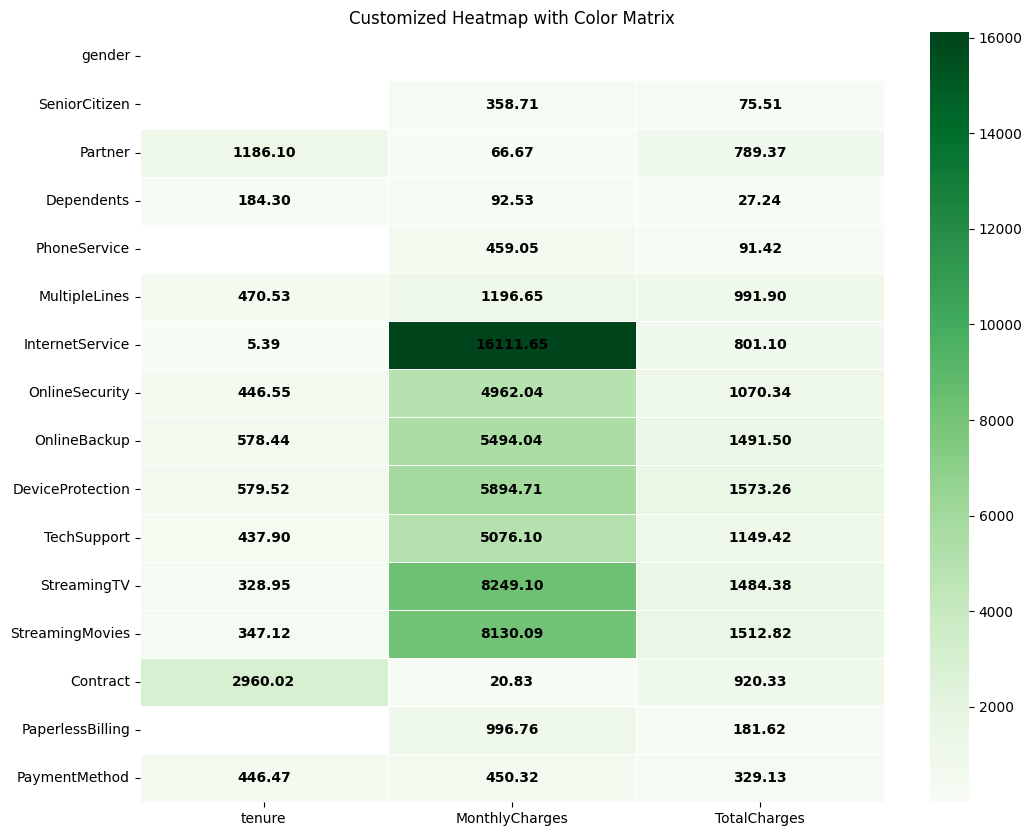

In [90]:
correlation(df,radio_buttons.value,contd_text_input,categorical_text_input)

In [88]:
class AllCorr:

    @staticmethod
    def cramers_v(x, y):   
        #-----------------------------------------------------------------------------------------------------------#
        # Authors: Lawshia Prabath
        # Purpose: This function calculates the correlation between categorical columns 
        # Language: Python
        # ----------------------------------------------------------------------------------------------------------# 
        from scipy.stats import chi2_contingency
        import numpy as np
        confusion_matrix = pd.crosstab(x, y)
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
        r_corr = r - ((r - 1) ** 2) / (n - 1)
        k_corr = k - ((k - 1) ** 2) / (n - 1)
        return round(np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1))),2)

    @staticmethod
    def categ_vs_categ(dataframe,categorical_columns):
        #-----------------------------------------------------------------------------------------------------------#
        # Authors: Lawshia Prabath
        # Purpose: This function calculates the correlation matrix between categorical variables
        # Language: Python
        # ----------------------------------------------------------------------------------------------------------# 
        correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
        for col1 in categorical_columns:
            for col2 in categorical_columns:
                correlation_matrix.loc[col1, col2] = AllCorr.cramers_v(dataframe[col1], dataframe[col2])
        return correlation_matrix
    
    
    @staticmethod
    def heat_map(title,flag,input_parameter,color_matrix):
        #-----------------------------------------------------------------------------------------------------------#
        # Authors: Lawshia Prabath
        # Purpose: This function visualizes the correlation as heatmap
        # Language: Python
        # ----------------------------------------------------------------------------------------------------------#        
        import seaborn as sns
        import matplotlib.pyplot as plt
        # Visualize the correlation matrix
        plt.figure(figsize=(12, 10))

        # Create a custom colormap with green color
        cmap = "Greens"
        # Create the heatmap with custom cell colors
        plt.figure(figsize=(12, 10))
        if flag:
            sns.heatmap(input_parameter.astype(float), annot=True, cmap=cmap, linewidths=0.5,
                        mask=color_matrix, fmt='.2f', annot_kws={'color': 'black', 'weight': 'bold'})
        else:
            sns.heatmap(input_parameter.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)          
        plt.title("Customized Heatmap with Color Matrix")
        plt.show()

    @staticmethod    
    def ANOVA(df,categorical_column,continuous_column):
        #-----------------------------------------------------------------------------------------------------------#
        # Authors: Lawshia Prabath
        # Purpose: This function calculates the correlation between continuous and categorical variables
        # Language: Python
        # ----------------------------------------------------------------------------------------------------------# 
        from scipy.stats import f_oneway
        groups = [group[continuous_column] for name, group in df.groupby(categorical_column)]
        f_statistic, p_value = f_oneway(*groups)
        return round(f_statistic,2),round(p_value,2)

    @staticmethod
    def contd_vs_categ(df,continuous_column,categorical_column):
        #-----------------------------------------------------------------------------------------------------------#
        # Authors: Lawshia Prabath
        # Purpose: This function calculates the correlation matrix between categorical and continuous variables
        # Language: Python
        # ----------------------------------------------------------------------------------------------------------#
        import openpyxl
        from openpyxl.styles import Font
        correlation_matrix = pd.DataFrame(columns=continuous_column, index=categorical_column)
        color_matrix = pd.DataFrame(columns=continuous_column, index=categorical_column)

        for col1 in continuous_column:
            for col2 in categorical_column:
                correlation_matrix.loc[col2, col1] = AllCorr.ANOVA(df,col2,col1)[0]

                if AllCorr.ANOVA(df,col2,col1)[1].astype(float) < 0.05:
                    color_matrix.loc[col2, col1] = False 
                else: 
                    color_matrix.loc[col2, col1] = True

        return correlation_matrix,color_matrix

    @staticmethod    
    def pearson(dataframe,col1,col2):
        #-----------------------------------------------------------------------------------------------------------#
        # Authors: Lawshia Prabath
        # Purpose: This function calculates the correlation between continuous variables
        # Language: Python
        # ----------------------------------------------------------------------------------------------------------#         

        from scipy.stats import pearsonr
        return pearsonr(dataframe[col1], dataframe[col2])


    @staticmethod
    def contd_vs_contd(dataframe,continuous_column):
        #-----------------------------------------------------------------------------------------------------------#
        # Authors: Lawshia Prabath
        # Purpose: This function calculates the correlation matrix between continuous variables
        # Language: Python
        # ----------------------------------------------------------------------------------------------------------#
        import openpyxl
        from openpyxl.styles import Font
        correlation_matrix = pd.DataFrame(columns=continuous_column, index=continuous_column)
        color_matrix = pd.DataFrame(columns=continuous_column, index=continuous_column)

        for col1 in continuous_column:
            for col2 in continuous_column:
                correlation_matrix.loc[col2, col1] = AllCorr.pearson(dataframe,col1,col2)[0]

                if AllCorr.pearson(dataframe,col1,col2)[1].astype(float) < 0.05:
                    color_matrix.loc[col2, col1] = False 
                else: 
                    color_matrix.loc[col2, col1] = True

        return correlation_matrix,color_matrix    

    
    
def input_parameter(input_parameter):
    import ast
    if input_parameter == 'Continuous vs Continuous':
        contd_text_input= input("Continuous Columns List: ")
        categorical_text_input=contd_text_input        
        return ast.literal_eval(contd_text_input),ast.literal_eval(categorical_text_input)
    elif input_parameter == 'Categorical vs Categorical':
        contd_text_input = input("Categorical Columns List: ")
        categorical_text_input=contd_text_input
        return ast.literal_eval(contd_text_input),ast.literal_eval(categorical_text_input)
    else:
        contd_text_input = input("Continuous Columns List: ")
        categorical_text_input = input("Categorical Columns List: ")
        return ast.literal_eval(contd_text_input),ast.literal_eval(categorical_text_input)
    
    
    
def correlation(dataframe,input_parameter,input_lis1,input_lis2):
    if input_parameter == 'Continuous vs Continuous':        
        AllCorr.heat_map('Continuous vs Continuous',True,AllCorr.contd_vs_contd(dataframe,input_lis1)[0],AllCorr.contd_vs_contd(dataframe,input_lis1)[1])
               
    elif input_parameter == 'Categorical vs Categorical':
        AllCorr.heat_map('Categorical vs Categorical',False,AllCorr.categ_vs_categ(dataframe,input_lis2),AllCorr.categ_vs_categ(dataframe,input_lis2))

    else:
        AllCorr.heat_map('Categorical vs Continuous',True,AllCorr.contd_vs_categ(dataframe,input_lis1,input_lis2)[0],AllCorr.contd_vs_categ(df,input_lis1,input_lis2)[1])
    